#                                                                       CAB RIDES ANALYSIS

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [175]:
df =  pd.read_csv('ehailshare.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Data Cleaning

In [176]:
df.shape

(693071, 57)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Checking for percentage of null values

In [178]:
missing_perc = df.isna().sum()/df.shape[0]*100
missing_perc

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


Examining the distribution of null values, descriptive analysis was performed to obtain summary statistics for the null values. In this case, the mean is approximately 0.07, and the standard deviation is relatively low. Our hypothesis suggests that the null values are randomly distributed.

Mean: 0.07949402009317949
Standard Deviation: 0.2705084590978732


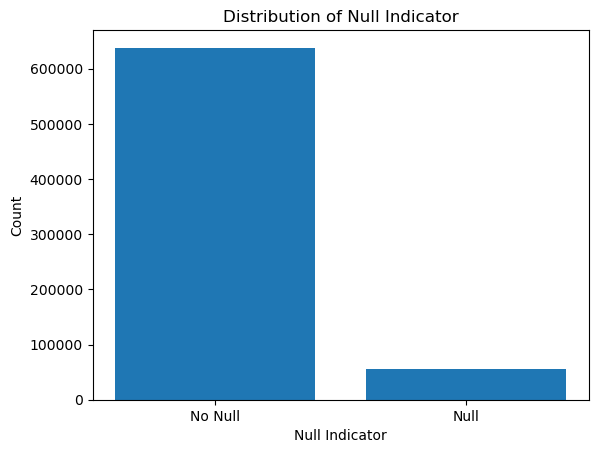

Chi-square statistic: 0.0
p-value: 1.0


In [179]:

null_indicator = df['price'].isnull().astype(int)

# Descriptive statistics
mean = null_indicator.mean()
std_dev = null_indicator.std()
print("Mean:", mean)
print("Standard Deviation:", std_dev)

# Step 3b: Visualization
plt.bar([0, 1], null_indicator.value_counts())
plt.xticks([0, 1], ['No Null', 'Null'])
plt.xlabel('Null Indicator')
plt.ylabel('Count')
plt.title('Distribution of Null Indicator')
plt.show()

# Statistical test
observed = pd.crosstab(index=null_indicator, columns='count')
chi2, p_value, _, _ = chi2_contingency(observed)
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Based on the obtained p-value, there is no evidence to reject the null hypothesis. Failing to reject the null hypothesis suggests that the null values appear to be randomly distributed. This indicates that the observed distribution of null values is entirely consistent with what would be expected under the assumption of randomness. Therefore, it is reasonable to drop the related rows with null values since they are not expected to have any impact on our analysis.

In [180]:
df = df.dropna()
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [181]:
df.shape

(637976, 57)

In [182]:
print(df.columns)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [183]:
df.duplicated().sum()

0

In [184]:
df['month'].unique()

array([12, 11])

### Mapping month values with month name

In [185]:
month_mapping = {
    11: 'November',
    12: 'December'
}

df['month'] = df['month'].map(month_mapping)

df.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,December,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,November,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,November,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,November,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,November,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Converting time columns to appropriate data type

In [186]:


df['datetime'] = pd.to_datetime(df['datetime'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['windGustTime'] = pd.to_datetime(df['windGustTime'], unit='s')
df['temperatureHighTime'] =  pd.to_datetime(df['temperatureHighTime'], unit='s')
df['temperatureLowTime'] =  pd.to_datetime(df['temperatureLowTime'], unit='s')
df['apparentTemperatureHighTime'] =  pd.to_datetime(df['apparentTemperatureHighTime'], unit='s')
df['apparentTemperatureLowTime'] =  pd.to_datetime(df['apparentTemperatureLowTime'], unit='s')
df['sunriseTime'] = pd.to_datetime(df['sunriseTime'], unit='s')
df['sunsetTime'] =  pd.to_datetime(df['sunsetTime'], unit='s')
df['uvIndexTime'] =  pd.to_datetime(df['uvIndexTime'], unit='s')
df['temperatureMinTime'] =  pd.to_datetime(df['temperatureMinTime'], unit='s')
df['temperatureMaxTime'] =  pd.to_datetime(df['temperatureMaxTime'], unit='s')
df['apparentTemperatureMinTime'] =  pd.to_datetime(df['apparentTemperatureMinTime'], unit='s')
df['apparentTemperatureMaxTime'] =  pd.to_datetime(df['apparentTemperatureMaxTime'], unit='s')


df['year'] = df['datetime'].dt.year



df.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000128,9,16,December,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,2018-12-17 03:00:00,10.000,43.68,2018-12-16 14:00:00,34.19,2018-12-17 12:00:00,37.95,2018-12-16 14:00:00,27.39,2018-12-17 11:00:00,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,2018-12-16 12:08:04,2018-12-16 21:14:24,0.30,0.1276,2018-12-16 17:00:00,39.89,2018-12-17 02:00:00,43.68,2018-12-16 14:00:00,33.73,2018-12-17 02:00:00,38.07,2018-12-16 11:00:00,2018
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.676999936,2,27,November,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,2018-11-27 04:00:00,4.786,47.30,2018-11-26 17:00:00,42.10,2018-11-27 06:00:00,43.92,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,rain,41.83,1003.97,90,1.00,0,4.786,291.1,2018-11-26 11:49:29,2018-11-26 21:16:32,0.64,0.1300,2018-11-26 17:00:00,40.49,2018-11-26 12:00:00,47.30,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,43.92,2018-11-26 17:00:00,2018
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999872,1,28,November,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,2018-11-27 16:00:00,10.000,47.55,2018-11-27 12:00:00,33.10,2018-11-28 11:00:00,44.12,2018-11-27 12:00:00,29.11,2018-11-28 08:00:00,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,2018-11-27 11:50:37,2018-11-27 21:16:04,0.68,0.1064,2018-11-27 17:00:00,35.36,2018-11-28 04:00:00,47.55,2018-11-27 12:00:00,31.04,2018-11-28 04:00:00,44.12,2018-11-27 12:00:00,2018
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02.749000192,4,30,November,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,2018-11-29 18:00:00,10.000,45.03,2018-11-29 17:00:00,28.90,2018-11-30 12:00:00,38.53,2018-11-29 17:00:00,26.20,2018-11-30 11:00:00,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,2018-11-29 11:52:50,2018-11-29 21:15:14,0.75,0.0000,2018-11-29 16:00:00,34.67,2018-11-30 04:00:00,45.03,2018-11-29 17:00:00,30.30,2018-11-30 04:00:00,38.53,2018-11-29 17:00:00,2018
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20.223000064,3,29,November,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,2018-11-28 23:00:00,10.000,42.18,2018-11-28 16:00:00,36.71,2018-11-29 08:00:00,35.75,2018-11-28 16:00:00,30.29,2018-11-29 03:00:00,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,2018-11-28 11:51:44,2018-11-28 21:15:38,0.72,0.0001,2018-11-28 16:00:00,33.10,2018-11-28 11:00:00,42.18,2018-11-28 16:00:00,29.11,2018-11-28 08:00:00,35.75,2018-11-28 16:00:00,2

In [187]:
df['day_of_week'] = df['datetime'].dt.dayofweek

weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'

}


df['day_of_week'] = df['day_of_week'].map(weekday_mapping)



df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,day_of_week
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000128,9,16,December,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,2018-12-17 03:00:00,10.000,43.68,2018-12-16 14:00:00,34.19,2018-12-17 12:00:00,37.95,2018-12-16 14:00:00,27.39,2018-12-17 11:00:00,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,2018-12-16 12:08:04,2018-12-16 21:14:24,0.30,0.1276,2018-12-16 17:00:00,39.89,2018-12-17 02:00:00,43.68,2018-12-16 14:00:00,33.73,2018-12-17 02:00:00,38.07,2018-12-16 11:00:00,2018,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.676999936,2,27,November,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,2018-11-27 04:00:00,4.786,47.30,2018-11-26 17:00:00,42.10,2018-11-27 06:00:00,43.92,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,rain,41.83,1003.97,90,1.00,0,4.786,291.1,2018-11-26 11:49:29,2018-11-26 21:16:32,0.64,0.1300,2018-11-26 17:00:00,40.49,2018-11-26 12:00:00,47.30,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,43.92,2018-11-26 17:00:00,2018,Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999872,1,28,November,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,2018-11-27 16:00:00,10.000,47.55,2018-11-27 12:00:00,33.10,2018-11-28 11:00:00,44.12,2018-11-27 12:00:00,29.11,2018-11-28 08:00:00,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,2018-11-27 11:50:37,2018-11-27 21:16:04,0.68,0.1064,2018-11-27 17:00:00,35.36,2018-11-28 04:00:00,47.55,2018-11-27 12:00:00,31.04,2018-11-28 04:00:00,44.12,2018-11-27 12:00:00,2018,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02.749000192,4,30,November,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,2018-11-29 18:00:00,10.000,45.03,2018-11-29 17:00:00,28.90,2018-11-30 12:00:00,38.53,2018-11-29 17:00:00,26.20,2018-11-30 11:00:00,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,2018-11-29 11:52:50,2018-11-29 21:15:14,0.75,0.0000,2018-11-29 16:00:00,34.67,2018-11-30 04:00:00,45.03,2018-11-29 17:00:00,30.30,2018-11-30 04:00:00,38.53,2018-11-29 17:00:00,2018,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20.223000064,3,29,November,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,2018-11-28 23:00:00,10.000,42.18,2018-11-28 16:00:00,36.71,2018-11-29 08:00:00,35.75,2018-11-28 16:00:00,30.29,2018-11-29 03:00:00,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,2018-11-28 11:51:44,2018-11-28 21:15:38,0.72,0.0001,2018-11-28 16:00:00,33.10,2018-11-28 11:00:00,42.18,2018-11-28 16:00:00,29.11,201

In [188]:
df['year'].unique()

array([2018])

In [189]:
df['day_of_week'].unique()

array(['Sunday', 'Tuesday', 'Wednesday', 'Friday', 'Thursday', 'Monday',
       'Saturday'], dtype=object)

 Convert distance from miles to kilometers and temperature to celsius

In [190]:
#
df['distance'] = df['distance'] * 1.60934
# Convert to celcius
df['temperature_celsius'] = (df['temperature'] - 32) * 5/9

In [191]:
df.to_csv('Clean_hailshare.csv')

# EDA

In [192]:
df.describe()

,hour,day,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,year,temperature_celsius
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.0,637976.000000
mean,11.618528,17.797674,16.545125,3.523265,1.015068,42.338161,-71.066144,39.582406,35.87844,0.008909,0.145941,0.741056,6.186795,8.470616,8.469180,45.039586,34.148928,41.612514,30.137973,31.652281,1010.092744,220.112705,0.686291,0.249031,8.469180,313.515634,0.579076,0.037369,33.456171,45.259945,29.729028,41.995876,2018.0,4.212448
std,6.948776,9.982083,9.324359,1.827266,0.095422,0.047856,0.020303,6.725500,7.91726,0.026880,0.328776,0.138575,3.147856,5.288683,2.601828,5.996033,6.381731,7.665189,8.056278,9.141390,13.475580,99.087172,0.358599,0.474306,2.601828,27.951377,0.244674,0.055216,6.466349,5.644414,7.109907,6.935538,0.0,3.736389
min,0.000000,1.000000,2.500000,0.032187,1.000000,42.214800,-71.105400,18.910000,12.13000,0.000000,0.000000,0.380000,0.450000,0.800000,0.717000,32.680000,17.850000,22.620000,11.810000,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,0.090000,0.000000,15.630000,33.510000,11.810000,28.950000,2018.0,-7.272222
25%,6.000000,13.000000,9.000000,2.043862,1.000000,42.350300,-71.081000,36.450000,31.91000,0.000000,0.000000,0.640000,3.410000,4.060000,8.432000,42.570000,30.170000,36.570000,27.700000,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,0.300000,0.000000,30.170000,42.570000,27.760000,36.570000,2018.0,2.472222
50%,12.000000,17.000000,13.500000,3.476174,1.000000,42.351900,-71.063100,40.490000,35.90000,0.000000,0.000000,0.710000,5.910000,7.550000,9.880000,44.660000,34.180000,40.950000,30.030000,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,0.680000,0.000400,34.240000,44.660000,30.130000,40.950000,2018.0,4.716667
75%,18.000000,28.000000,22.500000,4.715366,1.000000,42.364700,-71.054200,43.580000,40.01000,0.000000,0.000000,0.880000,8.410000,11.740000,9.996000,46.910000,38.730000,44.120000,35.320000,38.120000,1021.860000,303.000000,1.000000,0.000000,9.996000,331.800000,0.790000,0.091600,38.880000,46.910000,35.710000,44.120000,2018.0,6.433333
max,23.000000,30.000000,97.500000,12.649412,3.000000,42.366100,-71.033000,57.220000,57.22000,0.144700,1.000000,0.960000,15.000000,27.250000,10.000000,57.870000,46.600000,57.200000,47.250000,50.670000,1035.550000,356.000000,1.000000,2.000000,10.000000,378.900000,0.930000,0.145900,43.100000,57.870000,40.050000,57.200000,2018.0,14.011111


In [193]:
df['icon'].unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day '], dtype=object)

In [194]:
df['long_summary'].unique()

array([' Rain throughout the day. ',
       ' Rain until morning, starting again in the evening. ',
       ' Light rain in the morning. ',
       ' Partly cloudy throughout the day. ',
       ' Mostly cloudy throughout the day. ',
       ' Light rain in the morning and overnight. ',
       ' Light rain until evening. ', ' Foggy in the morning. ',
       ' Overcast throughout the day. ',
       ' Possible drizzle in the morning. ',
       ' Rain in the morning and afternoon. '], dtype=object)

In [195]:
df['short_summary'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [196]:
df['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [197]:
df['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [198]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [199]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [200]:
df['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

## Demand

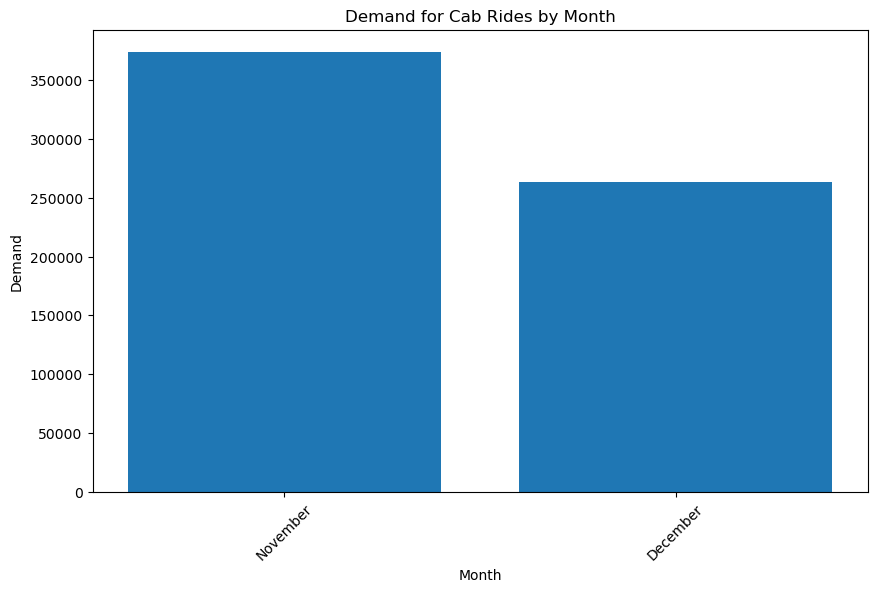

In [201]:
# Plot demand for cab rides by month
monthly_demand = df.groupby('month')['id'].count()
plt.figure(figsize=(10, 6))
plt.bar(monthly_demand.index, monthly_demand.values)
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Demand for Cab Rides by Month')
plt.xticks(np.arange(2), ['November', 'December'])
plt.xticks(rotation=45)
plt.show()

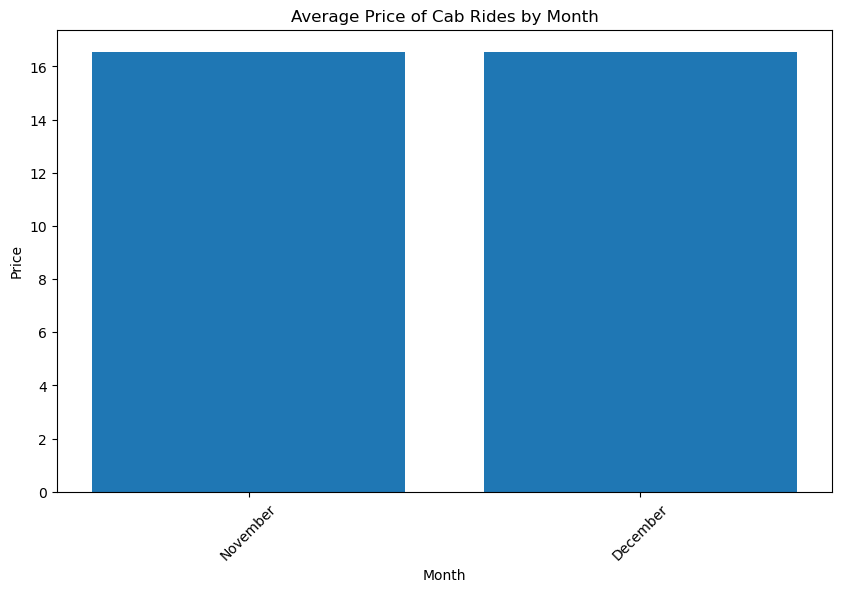

In [202]:
monthly_price = df.groupby('month')['price'].mean()
plt.figure(figsize=(10, 6))
plt.bar(monthly_price.index, monthly_price.values)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average Price of Cab Rides by Month')
plt.xticks(np.arange(2), ['November', 'December'])
plt.xticks(rotation=45)
plt.show()


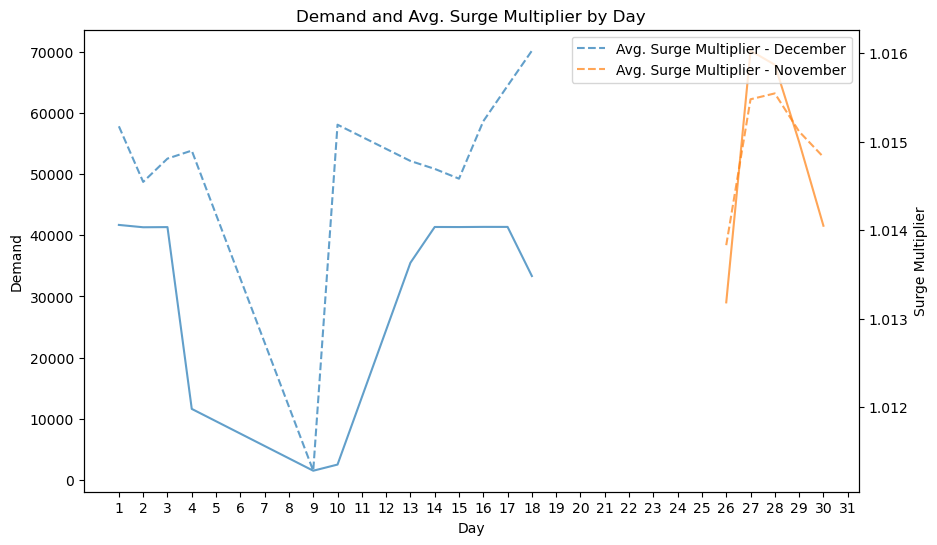

In [203]:
monthly_demand = df.groupby([df['day'], df['month']])['id'].count().unstack()
monthly_surge = df.groupby([df['day'], df['month']])['surge_multiplier'].mean().unstack()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
for month in monthly_demand.columns:
    ax1.plot(monthly_demand.index, monthly_demand[month], label=f'Demand - {month}', alpha=0.7)

ax1.set_xlabel('Day')
ax1.set_ylabel('Demand')
ax1.tick_params('y')

ax2 = ax1.twinx()

# Plot surge multiplier
for month in monthly_surge.columns:
    ax2.plot(monthly_surge.index, monthly_surge[month], label=f'Avg. Surge Multiplier - {month}', linestyle='dashed', alpha=0.7)

ax2.set_ylabel('Surge Multiplier')
ax2.tick_params('y')


plt.title('Demand and Avg. Surge Multiplier by Day')
plt.xticks(np.arange(1, 32))
plt.legend()
plt.show()


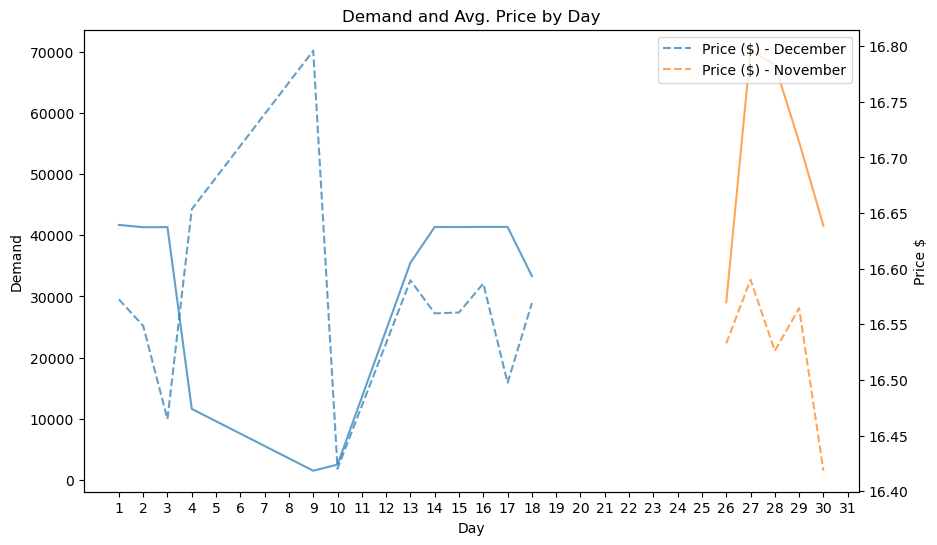

In [204]:
monthly_demand = df.groupby([df['day'], df['month']])['id'].count().unstack()
monthly_price = df.groupby([df['day'], df['month']])['price'].mean().unstack()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
for month in monthly_demand.columns:
    ax1.plot(monthly_demand.index, monthly_demand[month], label=f'Demand - {month}', alpha=0.7)

ax1.set_xlabel('Day')
ax1.set_ylabel('Demand')
ax1.tick_params('y')

ax2 = ax1.twinx()

# Plot average price
for month in monthly_price.columns:
    ax2.plot(monthly_price.index, monthly_price[month], label=f'Price ($) - {month}', linestyle='dashed', alpha=0.7)

ax2.set_ylabel('Price $')
ax2.tick_params('y')

plt.title('Demand and Avg. Price by Day')
plt.xticks(np.arange(1, 32))
plt.legend()
plt.show()


We can observe that the demand for cab rides consistently moves in line with the price, except for December (3-10). During this period, there appears to be a inconsistency in the relationship between demand and price.
To gain a deeper understanding of this anomaly, further analysis will be conducted to investigate the possible factors or events that might have influenced the demand pattern for cab rides during that specific timeframe. 

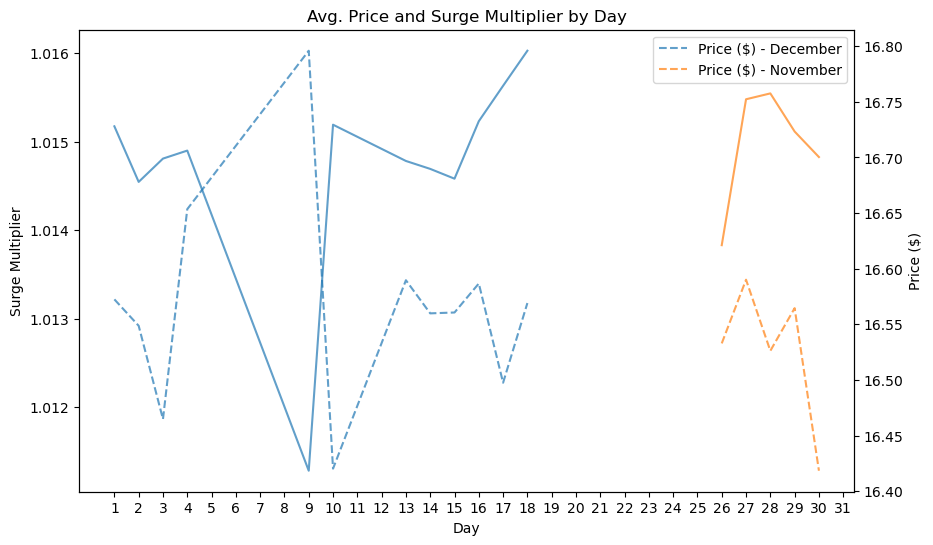

In [205]:
monthly_surge = df.groupby([df['day'], df['month']])['surge_multiplier'].mean().unstack()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot surge multiplier
for month in monthly_surge.columns:
    ax1.plot(monthly_surge.index, monthly_surge[month], label=f'Surge Multiplier - {month}', alpha=0.7)

ax1.set_xlabel('Day')
ax1.set_ylabel('Surge Multiplier')
ax1.tick_params('y')

ax2 = ax1.twinx()

# Plot average price
for month in monthly_price.columns:
    ax2.plot(monthly_price.index, monthly_price[month], label=f'Price ($) - {month}', linestyle='dashed', alpha=0.7)

ax2.set_ylabel('Price ($)')
ax2.tick_params('y')

plt.title('Avg. Price and Surge Multiplier by Day')
plt.xticks(np.arange(1, 32))
plt.legend()
plt.show()


The surge multiplier is a factor that represents a temporary increase in the price charged to customers during periods of high demand or low supply. So in n normal circumstances, we would expect the prices to stay consistent with the surge multiplier, especially during periods of high demand or low supply. However, in the specific case between the 3rd and 10th of December, it seems that there was a discrepancy between the surge multiplier and the prices charged to customers as well . However, between the 3rd and 10th of December, we can observe that the prices did not align with the surge multiplier. 

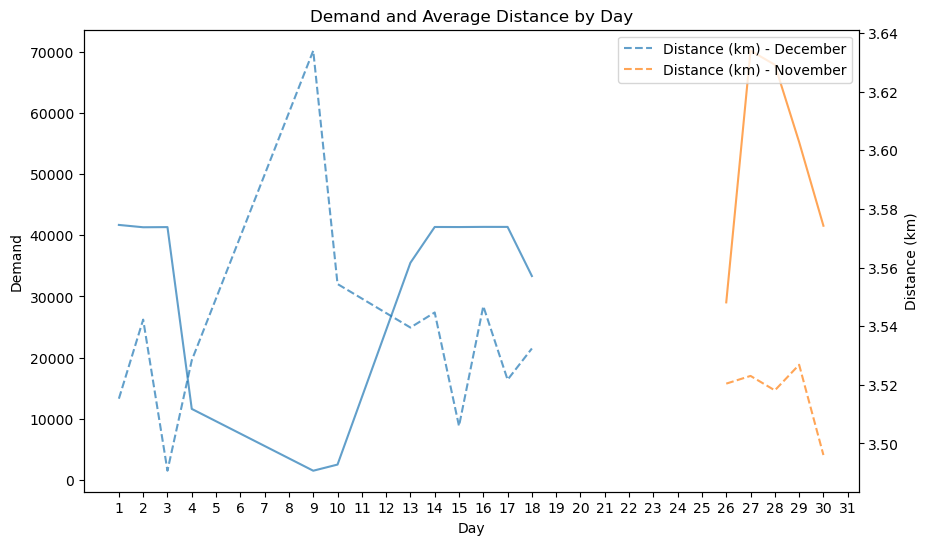

In [206]:

monthly_distance = df.groupby([df['day'], df['month']])['distance'].mean().unstack()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
for month in monthly_demand.columns:
    ax1.plot(monthly_demand.index, monthly_demand[month], label=f'Demand - {month}', alpha=0.7)

ax1.set_xlabel('Day')
ax1.set_ylabel('Demand')
ax1.tick_params('y')

ax2 = ax1.twinx()

# Plot distance price
for month in monthly_distance.columns:
    ax2.plot(monthly_distance.index, monthly_distance[month], label=f'Distance (km) - {month}', linestyle='dashed', alpha=0.7)

ax2.set_ylabel('Distance (km)')
ax2.tick_params('y')

plt.title('Demand and Average Distance by Day')
plt.xticks(np.arange(1, 32))
plt.legend()
plt.show()

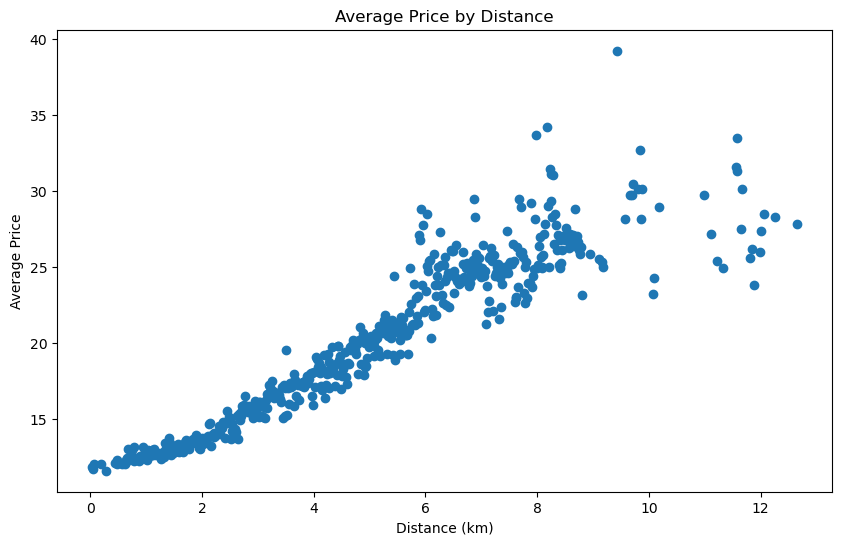

In [207]:
distance_price = df.groupby('distance')['price'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(distance_price.index, distance_price.values)
plt.xlabel('Distance (km)')
plt.ylabel('Average Price')
plt.title('Average Price by Distance')
plt.show()

We discovered that price has a positive correlation with distance, which helps explain the spike in prices during December. Although the demand for cabs may be lower when the distance traveled is higher, the price is primarily determined by the distance itself. This means that even if the demand is lower during longer trips, the price will still be influenced by the increased distance. Therefore, the higher prices observed during December could be attributed to longer trips and the corresponding increase in distance traveled, despite the relatively lower demand during that period.

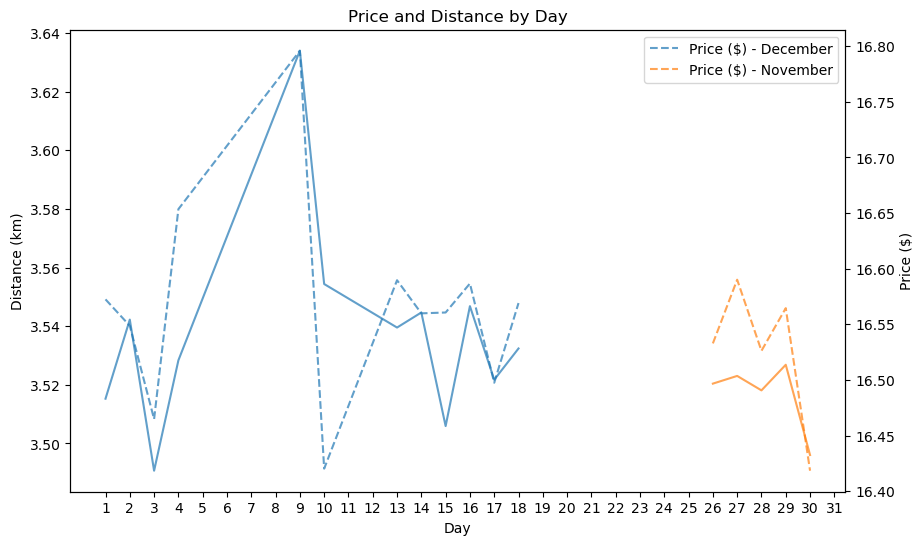

In [208]:
monthly_distance = df.groupby([df['day'], df['month']])['distance'].mean().unstack()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot distance
for month in monthly_distance.columns:
    ax1.plot(monthly_distance.index, monthly_distance[month], label=f'Distance - {month}', alpha=0.7)

ax1.set_xlabel('Day')
ax1.set_ylabel('Distance (km)')
ax1.tick_params('y')

ax2 = ax1.twinx()

# Plot average price
for month in monthly_price.columns:
    ax2.plot(monthly_price.index, monthly_price[month], label=f'Price ($) - {month}', linestyle='dashed', alpha=0.7)

ax2.set_ylabel('Price ($)')
ax2.tick_params('y')

plt.title('Price and Distance by Day')
plt.xticks(np.arange(1, 32))
plt.legend()
plt.show()


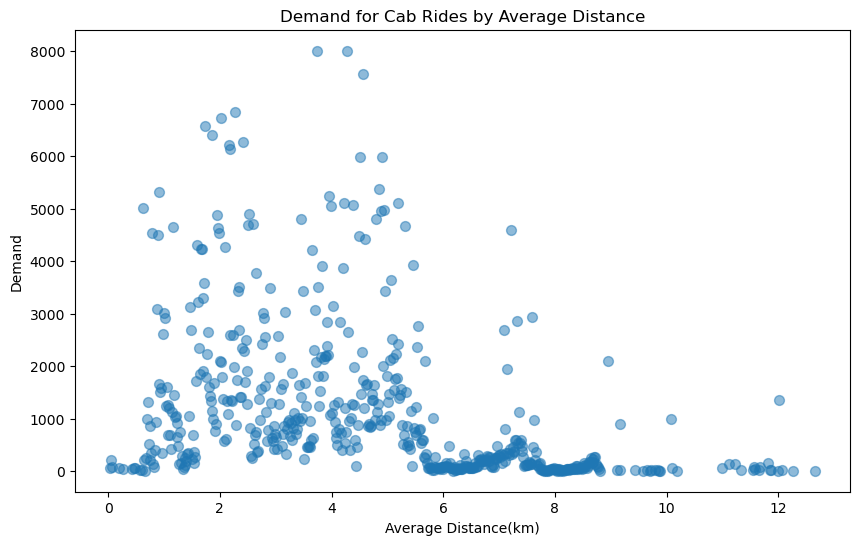

In [209]:
average_distance_demand = df.groupby('distance')['id'].count().groupby('distance').mean()

plt.figure(figsize=(10, 6))
plt.scatter(average_distance_demand.index, average_distance_demand.values, s=50, alpha=0.5)
plt.xlabel('Average Distance(km)')
plt.ylabel('Demand')
plt.title('Demand for Cab Rides by Average Distance')

plt.show()



Additionally, our analysis revealed that the majority of passengers tend to travel shorter distances. This finding supports the notion that many passengers prefer not to incur higher costs associated with longer trips. It suggests that most passengers have a preference for shorter distances, likely due to the desire to avoid higher fares. This aligns with the observed trend of higher prices being associated with longer distances, indicating that passengers are consciously making choices to minimize their expenses by opting for shorter trips.

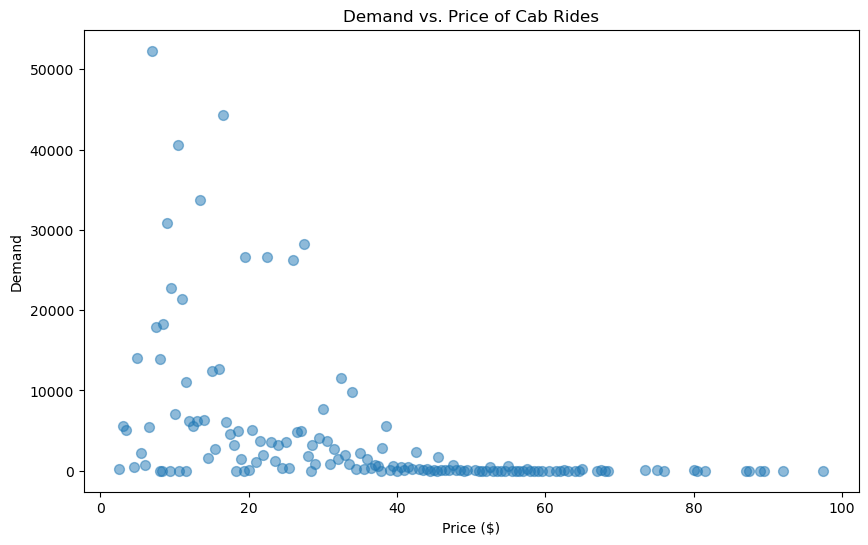

In [210]:

price_demand = df.groupby('price')['id'].count().groupby('price').mean()

# price_demand = df.groupby('id')['price'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(price_demand.index, price_demand.values, s=50, alpha=0.5)
plt.ylabel('Demand')
plt.xlabel('Price ($)')
plt.title('Demand vs. Price of Cab Rides')
plt.show()



The scatter plot indicates that there is a negative correlation between price and demand. In other words, as the price decreases, the demand increases. This finding suggests that lower prices tend to attract more customers and result in higher demand for cab rides.

## Analysis by Hour

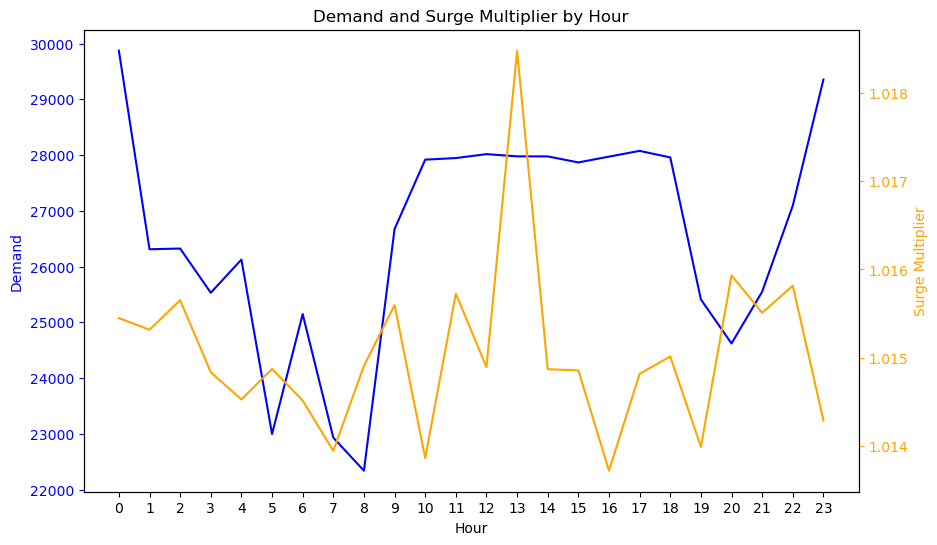

In [211]:


hourly_demand = df.groupby('hour')['id'].count()
hourly_surge = df.groupby('hour')['surge_multiplier'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
ax1.plot(hourly_demand.index, hourly_demand.values, label='Demand', color='blue')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Demand', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()

# Plot surge multiplier
ax2.plot(hourly_surge.index, hourly_surge.values, label='Surge Multiplier', color='orange')
ax2.set_ylabel('Surge Multiplier', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('Demand and Surge Multiplier by Hour')
plt.xticks(np.arange(24))
plt.show()



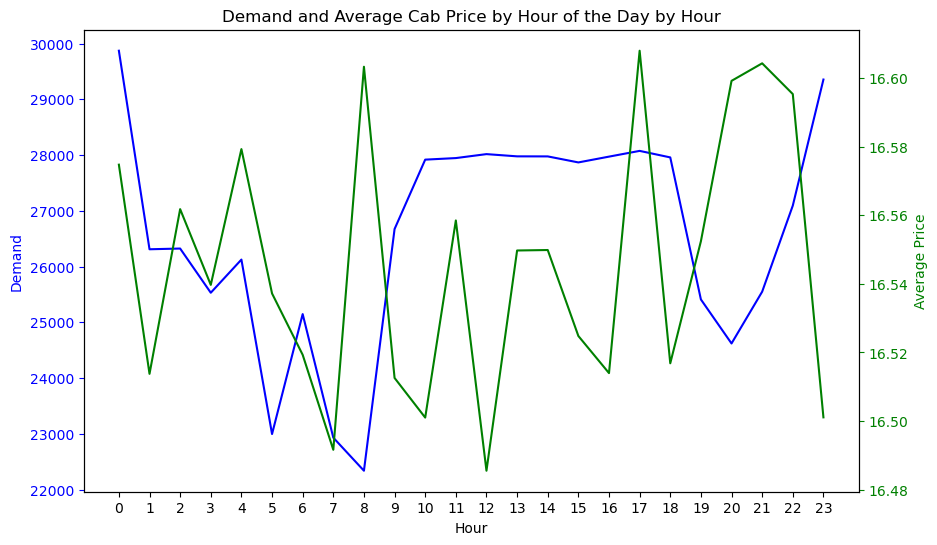

In [212]:

hourly_demand = df.groupby('hour')['id'].count()
hourly_price = df.groupby('hour')['price'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
ax1.plot(hourly_demand.index, hourly_demand.values, label='Demand', color='blue')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Demand', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()

# Plot average price
ax2.plot(hourly_price.index, hourly_price.values, label='Average Price', color='green')
ax2.set_ylabel('Average Price', color='green')
ax2.tick_params('y', colors='green')

plt.title('Demand and Average Cab Price by Hour of the Day by Hour')
plt.xticks(np.arange(24))
plt.show()


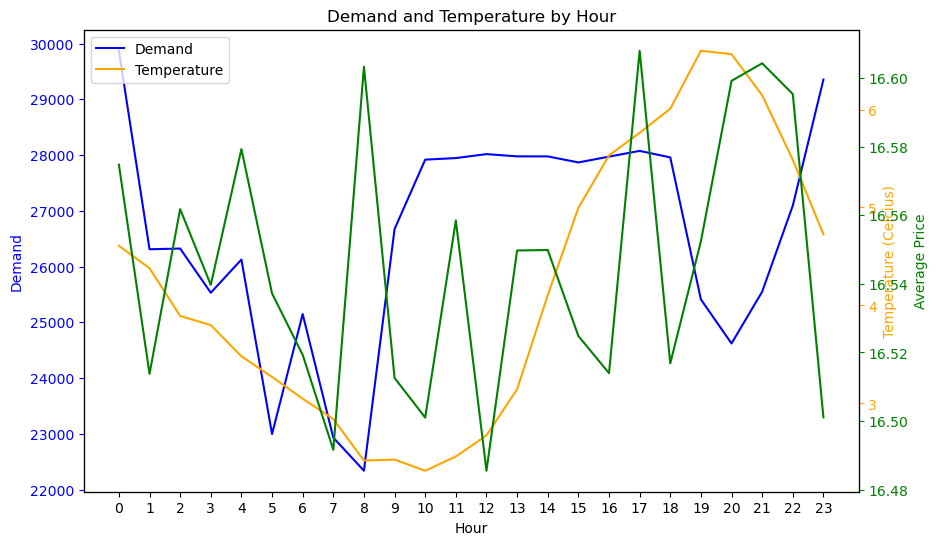

In [213]:
hourly_demand = df.groupby('hour')['id'].count()
hourly_temperature = df.groupby('hour')['temperature_celsius'].mean()
hourly_price = df.groupby('hour')['price'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
ax1.plot(hourly_demand.index, hourly_demand.values, label='Demand', color='blue')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Demand', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax3 = ax1.twinx()
# Plot temperature
ax2.plot(hourly_temperature.index, hourly_temperature.values, label='Temperature', color='orange')
ax2.set_ylabel('Temperature (Celcius)', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('Demand and Temperature by Hour')
ax3.plot(hourly_price.index, hourly_price.values, label='Average Price', color='green')
ax3.set_ylabel('Average Price', color='green')
ax3.tick_params('y', colors='green')


# Display the legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2 + labels_3
plt.legend(lines, labels, loc='upper left')
plt.xticks(np.arange(24))
plt.show()


- The analysis indicates a notable pattern in the relationship between demand and temperature. Prior to sunrise (around 11:00 AM), the demand shows a significant increase. This upward trend starts three hours earlier, between 8:00 AM and 10:00 AM. From 11:00 AM until approximately 5:30 PM, the demand remains relatively constant. Subsequently, there is a decline in demand until 8:00 PM, followed by a gradual rise leading up to sunset (around 9:00 PM) until 11:00 PM. This pattern suggests that a majority of people require rides a few hours before sunrise, possibly due to early morning commutes. After sunrise, the demand remains consistent until the evening when it rises again, likely indicating passengers' readiness to return home. To gain a deeper understanding of passenger destinations during these time periods, we will create visualizations to explore trip destinations.

### Demand for Rides by Day of Weeek

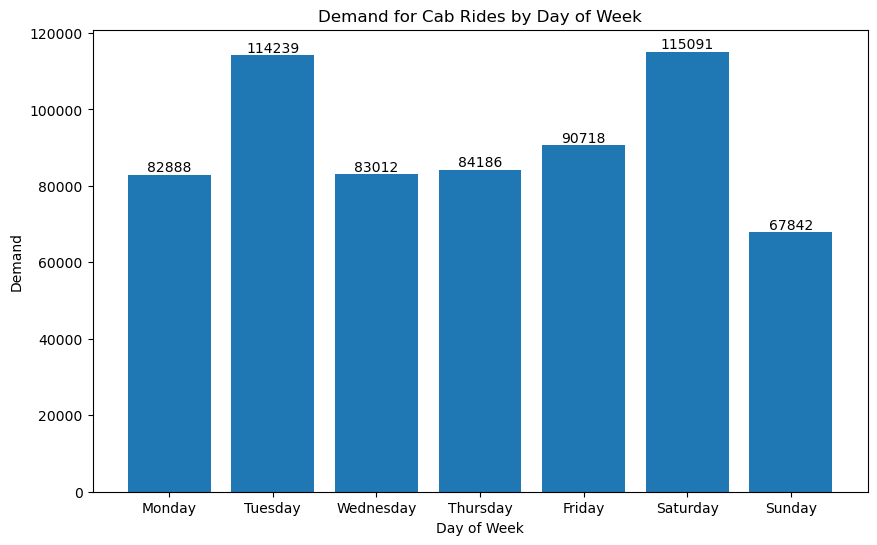

In [214]:
day_demand = df.groupby('day_of_week')['id'].count()
plt.figure(figsize=(10, 6))
bars = plt.bar(day_demand.index, day_demand.values)
plt.xlabel('Day of Week')
plt.ylabel('Demand')
plt.title('Demand for Cab Rides by Day of Week')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()


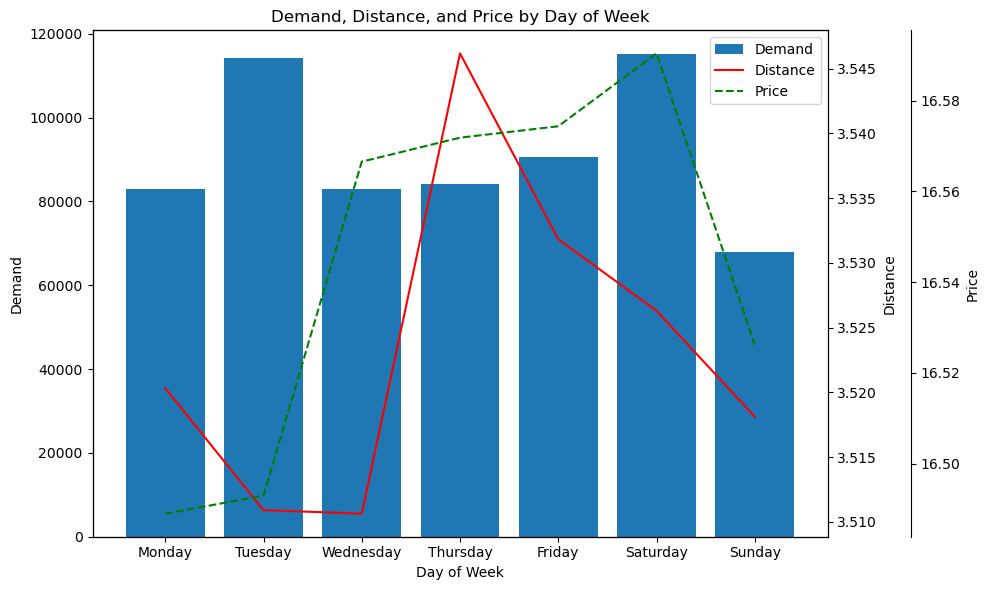

In [215]:
day_demand = df.groupby('day_of_week')['id'].count()
day_distance = df.groupby('day_of_week')['distance'].mean()
day_price = df.groupby('day_of_week')['price'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot demand
ax1.bar(day_demand.index, day_demand.values, label='Demand')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Demand')
ax1.set_xticks(np.arange(7))
ax1.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot distance
ax2 = ax1.twinx()
ax2.plot(day_distance.index, day_distance.values, color='red', label='Distance')
ax2.set_ylabel('Distance')

# Plot price
ax3 = ax1.twinx()
ax3.plot(day_price.index, day_price.values, color='green', linestyle='dashed', label='Price')
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Price')

# Set legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines = lines1 + lines2 + lines3
labels = labels1 + labels2 + labels3
ax1.legend(lines, labels)

plt.title('Demand, Distance, and Price by Day of Week')
plt.tight_layout()
plt.show()


The analysis reveals that the highest demand for cab rides occurred on Tuesdays and Saturdays. On Tuesdays, it can be observed that the average distance traveled and price were relatively low. This aligns with the previous insight that most people tend to travel shorter distances and prefer paying less. As prices increase, there is a decrease in demand, indicating sensitivity to higher prices.

In contrast, on Sundays, there was a high demand for cab rides despite a decrease in average distance traveled. This suggests that other factors, such as special events or increased leisure activities, may have influenced the demand on Sundays. Additionally, the observed decrease in distance could indicate that people were traveling to nearby destinations or utilizing cab services for shorter trips.


## Demand by Cab Type

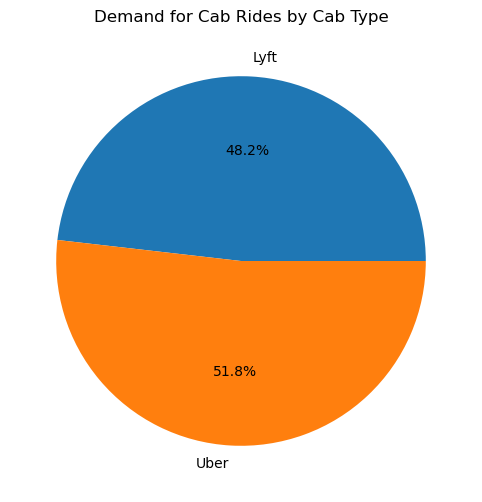

In [216]:
cabtype_demand = df.groupby('cab_type')['id'].count()

plt.figure(figsize=(8, 6))
plt.pie(cabtype_demand.values, labels=cabtype_demand.index, autopct='%1.1f%%')
plt.title('Demand for Cab Rides by Cab Type')

plt.show()


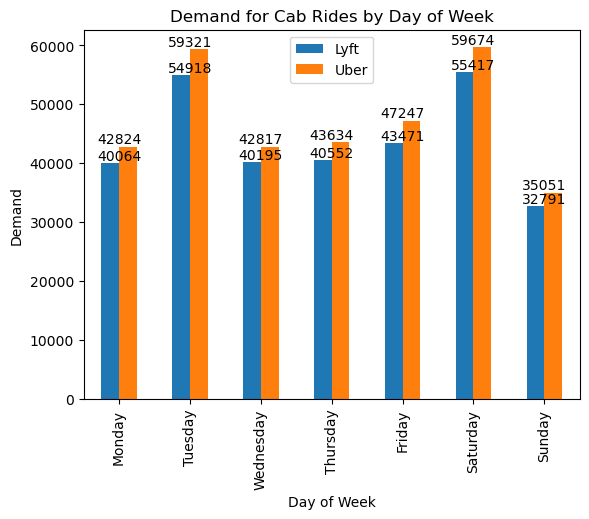

In [217]:
day_demand = df.groupby('day_of_week')['cab_type'].value_counts()
group_df = day_demand.unstack()

group_df.plot(kind='bar', stacked=False)

plt.xlabel('Day of Week')
plt.ylabel('Demand')
plt.title('Demand for Cab Rides by Day of Week')

for p in group_df.columns:
    for i, value in enumerate(group_df[p]):
        plt.text(i, value, str(value), ha='center', va='bottom')

plt.legend()
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()




The analysis of cab usage by day of the week reveals that Uber is the preferred choice for most people compared to Lyft across all days. This can be observed from the higher demand for Uber rides indicated by the taller bars in the graph. 

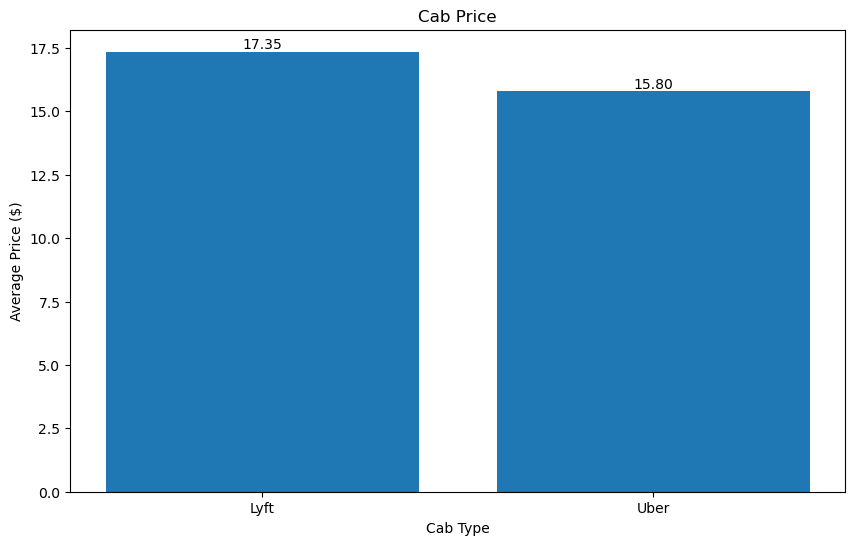

In [218]:
cab_type_price = df.groupby('cab_type')['price'].mean()

plt.figure(figsize=(10, 6))
plt.bar(cab_type_price.index, cab_type_price.values)

for i, val in enumerate(cab_type_price.values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')
plt.xlabel('Cab Type')
plt.ylabel('Average Price ($)')
plt.title('Cab Price')
plt.show()

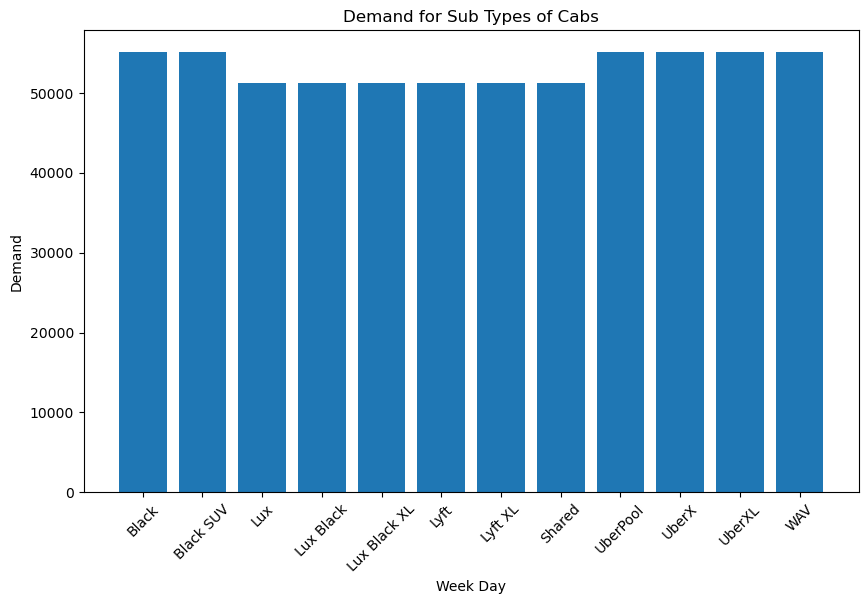

In [219]:

cab_demand = df.groupby('name')['id'].count()
plt.figure(figsize=(10, 6))
plt.bar(cab_demand.index, cab_demand.values)

plt.xlabel('Week Day')
plt.ylabel('Demand')
plt.title('Demand for Sub Types of Cabs')
plt.xticks(rotation=45)
plt.show()

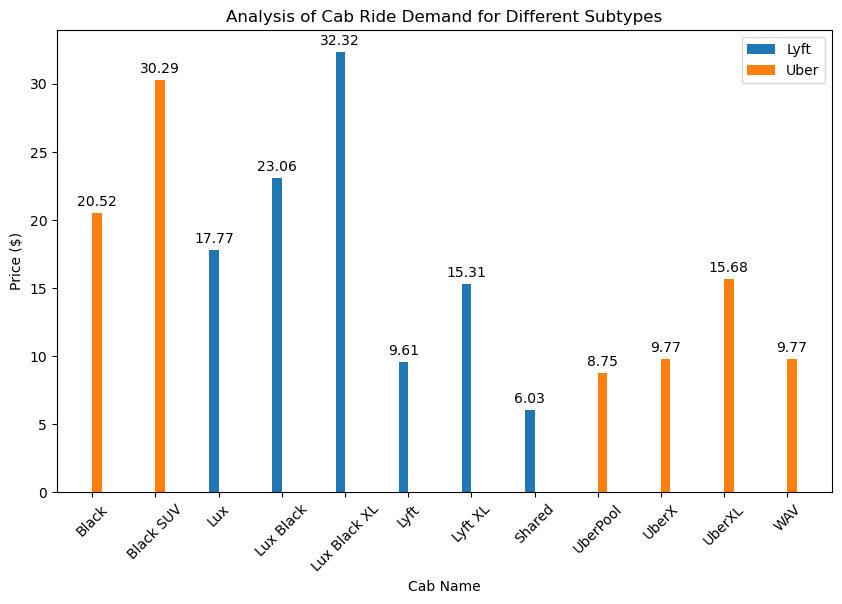

In [220]:
cab_name_demand = df.groupby(['name', 'cab_type'])['price'].mean().unstack()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(cab_name_demand.index))
bar_width = 0.15
cab_types = cab_name_demand.columns

for i, cab_type in enumerate(cab_types):
    ax.bar(x + i * bar_width, cab_name_demand[cab_type], width=bar_width, label=cab_type)

    for j, value in enumerate(cab_name_demand[cab_type]):
        ax.annotate(f'{value:.2f}', (x[j] + i * bar_width, value), xytext=(0, 5), textcoords='offset points',
                    ha='center')

ax.set_xticks(x + (len(cab_types) - 1) * bar_width / 2)
ax.set_xticklabels(cab_name_demand.index)

plt.xlabel('Cab Name')
plt.ylabel('Price ($)')
plt.title('Analysis of Cab Ride Demand for Different Subtypes')
plt.xticks(rotation=45)

plt.legend()
plt.show()




The analysis shows that the average price for Lyft is higher, which explains why there is a higher demand for Uber. As we have previously observed, people generally prefer to pay less for their rides. Given that Lyft has higher average prices, it is understandable that more customers opt for Uber, which offers comparatively lower prices.

This price difference between Lyft and Uber aligns with the insight that customers prioritize affordability and seek to minimize their expenses. By offering lower prices on average, Uber attracts a larger customer base. The demand for Uber is driven by its ability to cater to the preferences of price-conscious customers who prioritize cost-effectiveness in their transportation choices

We able to see that most people go for uber as compared to lyft because its cheaper

## Weather Analysis

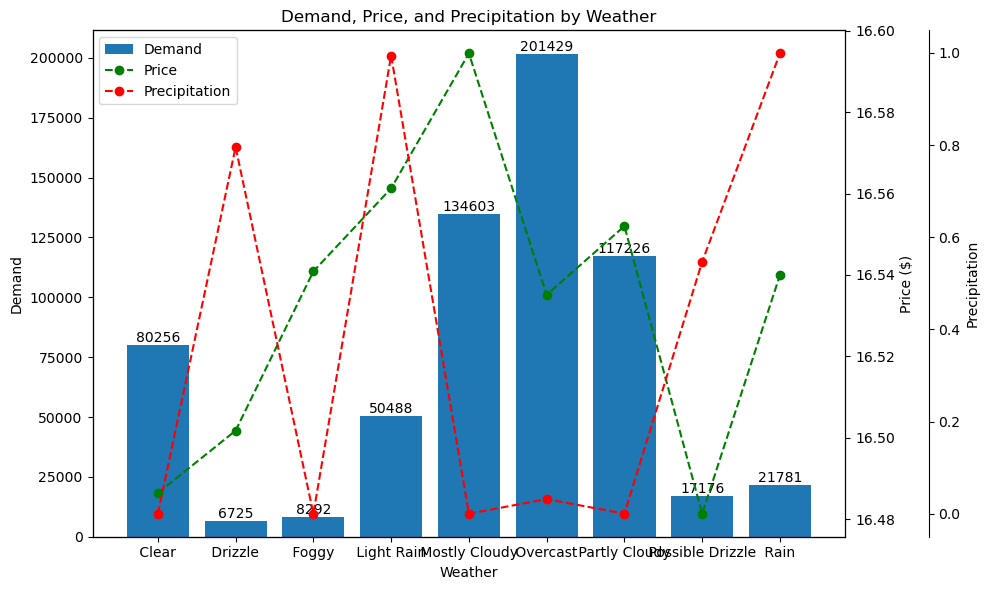

In [221]:
# Grouping demand, temperature, and price by weather conditions
weather_demand = df.groupby('short_summary')['id'].count()
weather_precipitation = df.groupby('short_summary')['precipProbability'].mean()
weather_price = df.groupby('short_summary')['price'].mean()

# Creating a DataFrame with the grouped data
weather_data = pd.DataFrame({'Demand': weather_demand, 'Precipitation': weather_precipitation, 'Price': weather_price})
weather_data.reset_index(inplace=True)

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(weather_data['short_summary'], weather_data['Demand'], label='Demand')
ax1.set_xlabel('Weather')
ax1.set_ylabel('Demand')

# Display values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Creating the second y-axis for price
ax2 = ax1.twinx()
ax2.plot(weather_data['short_summary'], weather_data['Price'], color='green', marker='o', linestyle='--')
ax2.set_ylabel('Price ($)')

# Creating the third y-axis for precipitation
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third y-axis
ax3.plot(weather_data['short_summary'], weather_data['Precipitation'], color='red', marker='o', linestyle='--')
ax3.set_ylabel('Precipitation')

# Custom legend handles and labels
legend_handles = [bars[0], ax2.lines[0], ax3.lines[0]]
legend_labels = ['Demand', 'Price', 'Precipitation']

# Adjusting the legend positions and labels
ax1.legend(legend_handles, legend_labels, loc='upper left')

# Setting the x-axis tick labels
plt.xticks(rotation=45)

plt.title('Demand, Price, and Precipitation by Weather')
plt.tight_layout()
plt.show()


The analysis shows that there is a correlation between weather conditions and the demand for cab rides. It is observed that the lower the precipitation (chance of rain), the higher the demand for cab rides. Additionally, the demand is high for weather conditions such as mostly cloudy, overcast, and partly cloudy. These weather conditions may indicate situations where people prefer using cabs rather than walking or using other means of transportation. Furthermore, the price of cab rides is relatively high during these weather conditions, which suggests that the demand and price are influenced by similar factors.

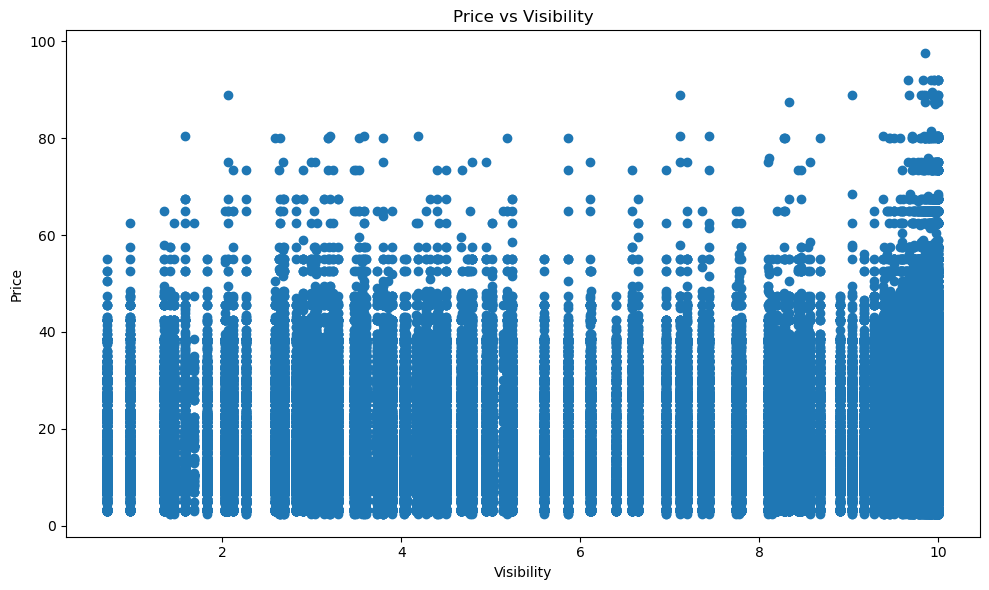

In [222]:
plt.figure(figsize=(10, 6))
plt.scatter(df['visibility'], df['price'])
plt.xlabel('Visibility')
plt.ylabel('Price')
plt.title('Price vs Visibility')
plt.tight_layout()
plt.show()


Seems that there is no significant relationship or correlation between visibility and price in the given data.

This insight suggests that variations in visibility, such as foggy or clear conditions, do not have a noticeable impact on the pricing of cab rides. Other factors, such as distance, demand, weather conditions, or time of day, might be more influential in determining the price of cab rides.

### Pick-up and Destination

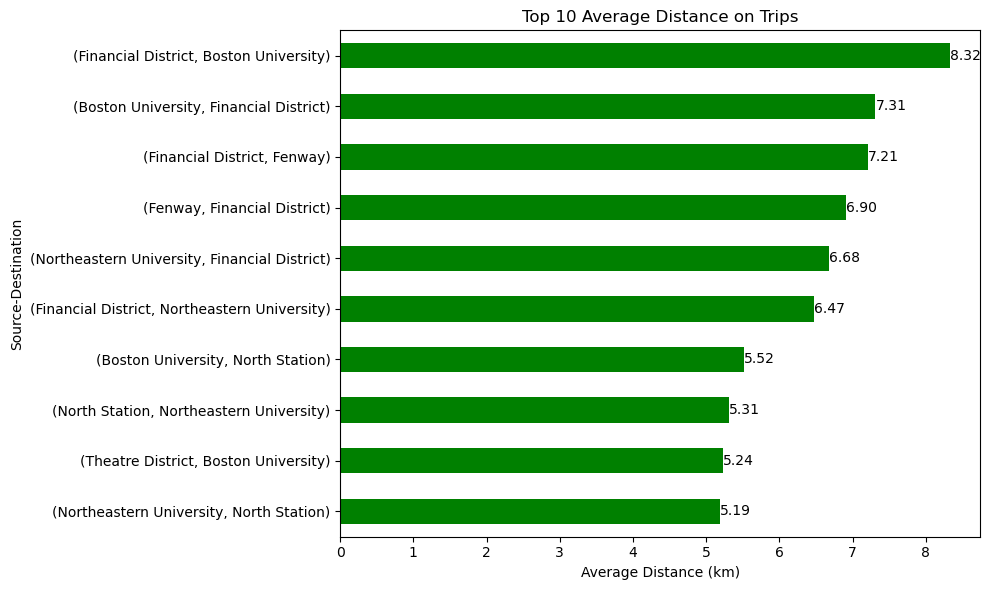

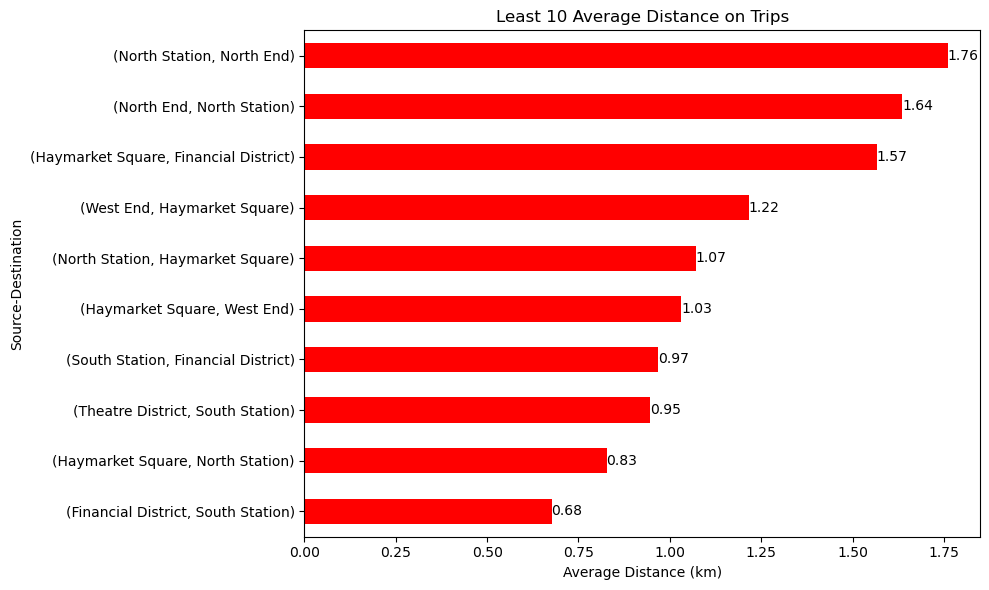

In [223]:

average_distance = df.groupby(['source', 'destination'])['distance'].mean()


sorted_distances = average_distance.sort_values()

top_10_distances = sorted_distances.tail(10)
least_10_distances = sorted_distances.head(10)

# top 10 distances
plt.figure(figsize=(10, 6))
top_10_distances.plot(kind='barh', color='green')
plt.xlabel('Average Distance (km)')
plt.ylabel('Source-Destination')
plt.title('Top 10 Average Distance on Trips')


for i, value in enumerate(top_10_distances.values):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Least Top 10
plt.figure(figsize=(10, 6))
least_10_distances.plot(kind='barh', color='red')
plt.xlabel('Average Distance (km)')
plt.ylabel('Source-Destination')
plt.title('Least 10 Average Distance on Trips')

for i, value in enumerate(least_10_distances.values):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()


The analysis reveals that the highest average distance traveled on trips is observed between the Financial District and Boston University, indicating that these locations are relatively far apart. On the other hand, the shortest distance is observed between the Financial District and South Station, suggesting that these locations are in close proximity.




#### Average Price on Trips

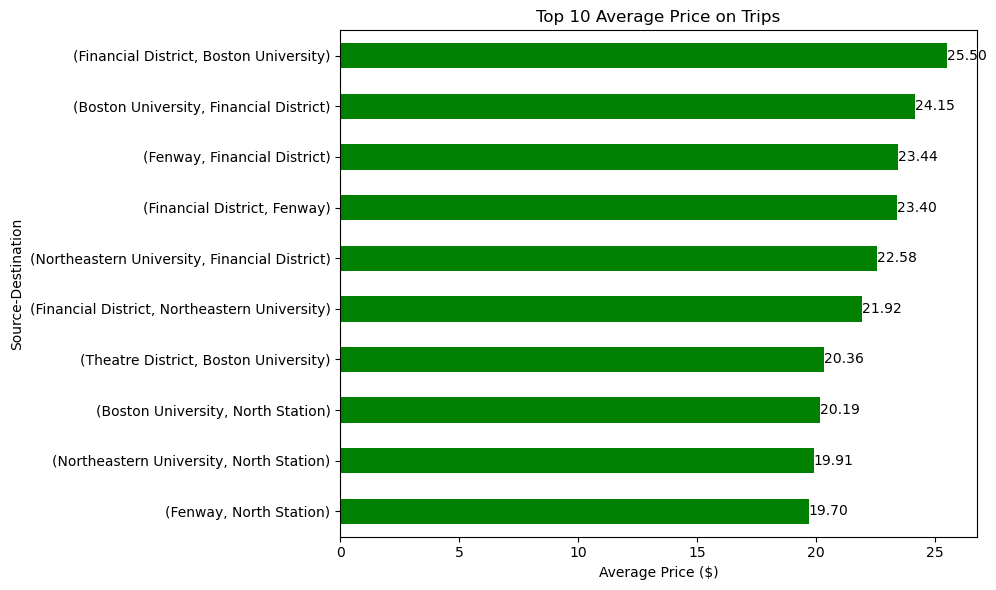

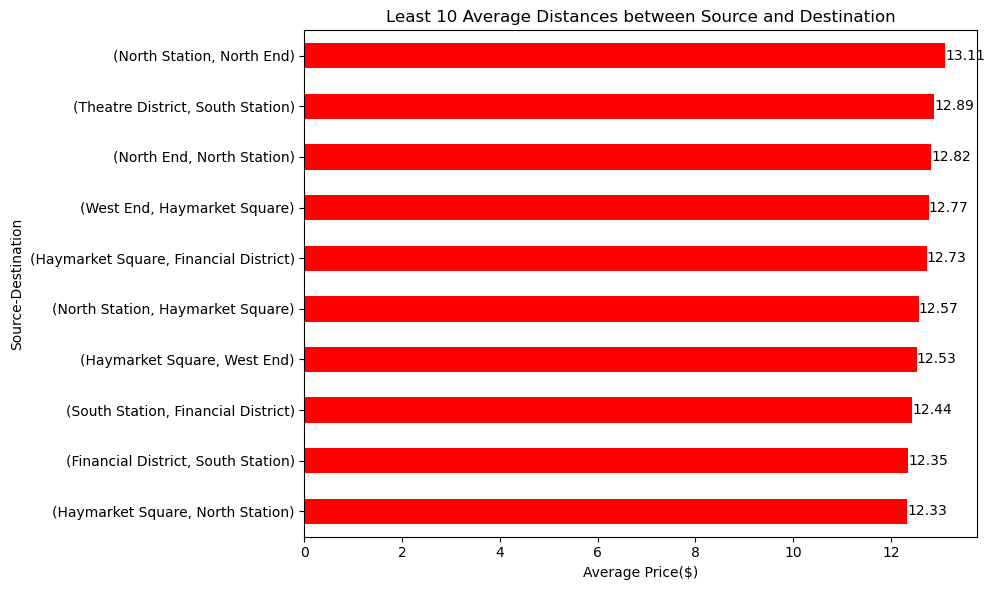

In [224]:


average_price = df.groupby(['source', 'destination'])['price'].mean()


sorted_price = average_price.sort_values()

top_10_prices = sorted_price.tail(10)
least_10_prices = sorted_price.head(10)

# top 10 distances
plt.figure(figsize=(10, 6))
top_10_prices.plot(kind='barh', color='green')
plt.xlabel('Average Price ($)')
plt.ylabel('Source-Destination')
plt.title('Top 10 Average Price on Trips')


for i, value in enumerate(top_10_prices.values):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Least Top 10
plt.figure(figsize=(10, 6))
least_10_prices.plot(kind='barh', color='red')
plt.xlabel('Average Price($)')
plt.ylabel('Source-Destination')
plt.title('Least 10 Average Distances between Source and Destination')

for i, value in enumerate(least_10_prices.values):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()





Furthermore, when considering the average prices, it is found that the highest average price is associated with trips from the Financial District to Boston University. This indicates that passengers tend to pay more for trips covering longer distances. In contrast, the lowest average price is observed for trips from Haymarket Square to North Station, followed by trips from the Financial District to South Station.

### Number of Trips Taken

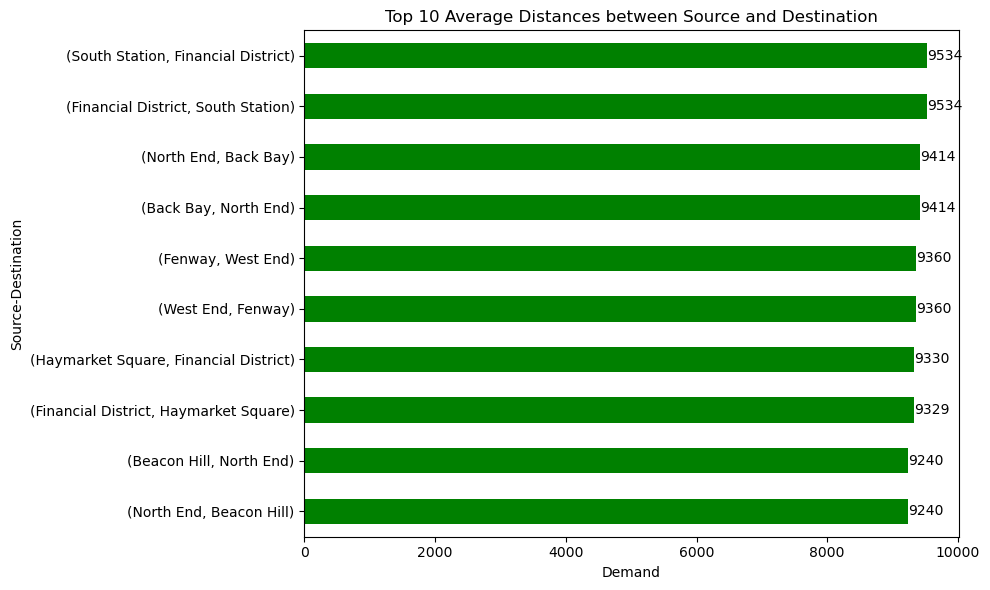

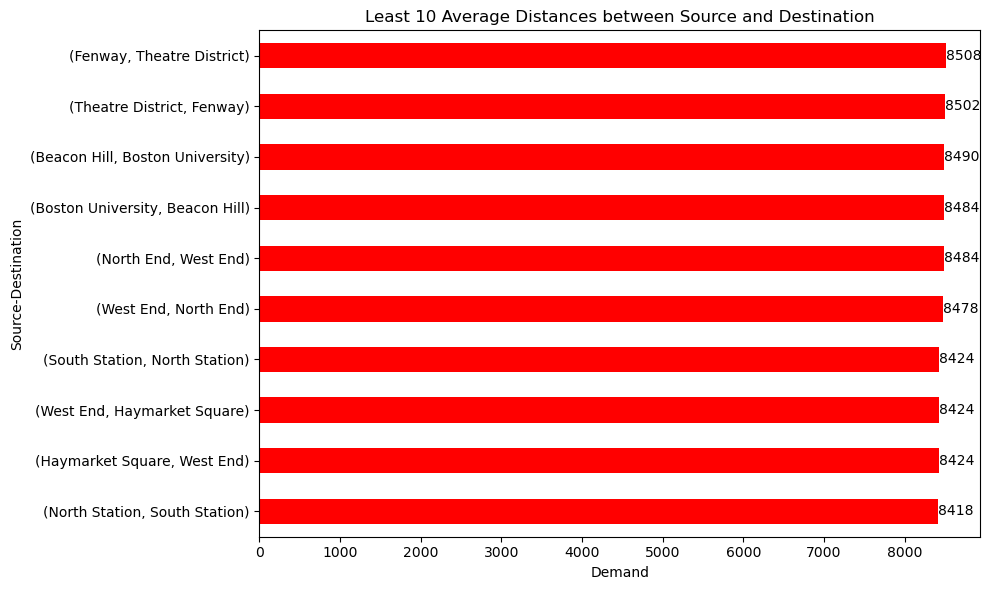

In [225]:



average_distance = df.groupby(['source', 'destination'])['id'].count()

sorted_distances = average_distance.sort_values()

# Get top 10 and least 10 average distances
top_10_distances = sorted_distances.tail(10)
least_10_distances = sorted_distances.head(10)


plt.figure(figsize=(10, 6))
top_10_distances.plot(kind='barh', color='green')
plt.xlabel('Demand')
plt.ylabel('Source-Destination')
plt.title('Top 10 Average Distances between Source and Destination')


for i, value in enumerate(top_10_distances.values):
    plt.text(value, i, f'{value}', ha='left', va='center')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
least_10_distances.plot(kind='barh', color='red')
plt.xlabel('Demand')
plt.ylabel('Source-Destination')
plt.title('Least 10 Average Distances between Source and Destination')

# Annotate the bars with values
for i, value in enumerate(least_10_distances.values):
    plt.text(value, i, f'{value}', ha='left', va='center')

plt.tight_layout()
plt.show()



In terms of trip frequency, the most commonly taken trips are from South Station to the Financial District. This implies that there is a high demand for transportation services from South Station to the bustling Financial District. On the other hand, the least frequently taken trips are observed from North Station to South Station, indicating a lower demand for transportation between these two locations.

# MODEL TRAINING

In [226]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,year,day_of_week,temperature_celsius
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000128,9,16,December,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.70811,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,2018-12-17 03:00:00,10.000,43.68,2018-12-16 14:00:00,34.19,2018-12-17 12:00:00,37.95,2018-12-16 14:00:00,27.39,2018-12-17 11:00:00,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,2018-12-16 12:08:04,2018-12-16 21:14:24,0.30,0.1276,2018-12-16 17:00:00,39.89,2018-12-17 02:00:00,43.68,2018-12-16 14:00:00,33.73,2018-12-17 02:00:00,38.07,2018-12-16 11:00:00,2018,Sunday,5.744444
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.676999936,2,27,November,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.70811,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,2018-11-27 04:00:00,4.786,47.30,2018-11-26 17:00:00,42.10,2018-11-27 06:00:00,43.92,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,rain,41.83,1003.97,90,1.00,0,4.786,291.1,2018-11-26 11:49:29,2018-11-26 21:16:32,0.64,0.1300,2018-11-26 17:00:00,40.49,2018-11-26 12:00:00,47.30,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,43.92,2018-11-26 17:00:00,2018,Tuesday,6.433333
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999872,1,28,November,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.70811,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,2018-11-27 16:00:00,10.000,47.55,2018-11-27 12:00:00,33.10,2018-11-28 11:00:00,44.12,2018-11-27 12:00:00,29.11,2018-11-28 08:00:00,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,2018-11-27 11:50:37,2018-11-27 21:16:04,0.68,0.1064,2018-11-27 17:00:00,35.36,2018-11-28 04:00:00,47.55,2018-11-27 12:00:00,31.04,2018-11-28 04:00:00,44.12,2018-11-27 12:00:00,2018,Wednesday,3.516667
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02.749000192,4,30,November,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.70811,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,2018-11-29 18:00:00,10.000,45.03,2018-11-29 17:00:00,28.90,2018-11-30 12:00:00,38.53,2018-11-29 17:00:00,26.20,2018-11-30 11:00:00,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,2018-11-29 11:52:50,2018-11-29 21:15:14,0.75,0.0000,2018-11-29 16:00:00,34.67,2018-11-30 04:00:00,45.03,2018-11-29 17:00:00,30.30,2018-11-30 04:00:00,38.53,2018-11-29 17:00:00,2018,Friday,1.322222
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20.223000064,3,29,November,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.70811,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,2018-11-28 23:00:00,10.000,42.18,2018-11-28 16:00:00,36.71,2018-11-29 08:00:00,35.75,2018-11-28 16:00:00,30.29,2018-11-29 03:00:00,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,2018-11-28 11:51:44,2018-11-28 21:15:38,0.72,0.0001,2018-11-28

In [227]:
df['minute'] = df['datetime'].dt.minute

column_order = ['hour', 'minute'] + [col for col in df.columns if col not in ['hour', 'minute']]
df = df[column_order]

In [228]:
columns_to_drop = ['datetime','precipProbability','temperature','windSpeed','windGust','year','visibility','long_summary','product_id','temperature','id', 'timestamp', 'timezone', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'windGustTime',
                   'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',  'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 
                   'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover','uvIndex', 'visibility', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
                   'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 
                   'apparentTemperatureMax', 'apparentTemperatureMaxTime']

df = df.drop(columns=columns_to_drop)


In [229]:
# df = df.drop(['id',month,product_id','timestamp','timezone','latitude','longitude','apparentTemperature','precipIntensity','windGustTime','temperatureHigh','temperatureHighTime','TemperatureLow',	
#               'temperatureLowTime',	'apparentTemperatureHigh',	'apparentTemperatureHighTime',	'apparentTemperatureLow',	'apparentTemperatureLowTime', 'icon	dewPoint','pressure',	
#               'windBearing','cloudCover',	'uvIndex',	'visibility',	'ozone',	'sunriseTime',	'sunsetTime',	'moonPhase',	
#               'precipIntensityMax',	'uvIndexTime',	'temperatureMin',	'temperatureMinTime',	'temperatureMax',	'temperatureMaxTime',
#               'apparentTemperatureMin',	'apparentTemperatureMinTime',	'apparentTemperatureMax','apparentTemperatureMaxTime',])

In [230]:
df.head(1)

,hour,minute,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,humidity,visibility.1,day_of_week,temperature_celsius
0,9,30,16,December,Haymarket Square,North Station,Lyft,Shared,5.0,0.70811,1.0,Mostly Cloudy,0.68,10.0,Sunday,5.744444
